In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/theleadio/datascience_demo/master/tripadvisor_hotel_reviews.csv")

In [3]:
df

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5
...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5
20487,great location price view hotel great quick pl...,4
20488,"ok just looks nice modern outside, desk staff ...",2
20489,hotel theft ruined vacation hotel opened sept ...,1


<Axes: xlabel='Rating', ylabel='count'>

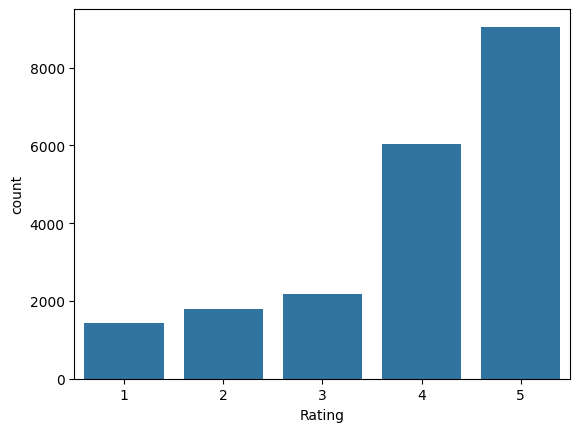

In [4]:
# prompt: show me the rating distribution
# pareto distribution, 80/20distribution
sns.countplot(x='Rating', data=df)


NameError: name 'rating' is not defined

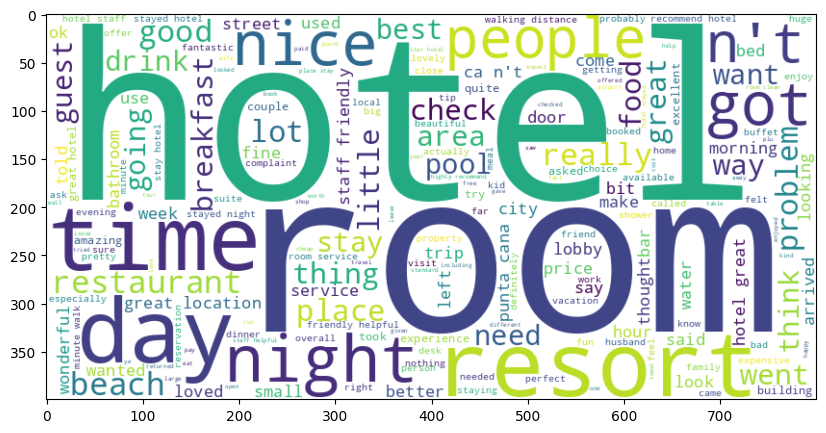

In [8]:
# prompt: draw a word cloud for rating

from wordcloud import WordCloud
import matplotlib.pyplot as plt
# Combine all reviews for each rating into a single string
text = " ".join(review for review in df.Review)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title(f'Word Cloud for Rating: {rating}')
plt.axis('off')
plt.show()


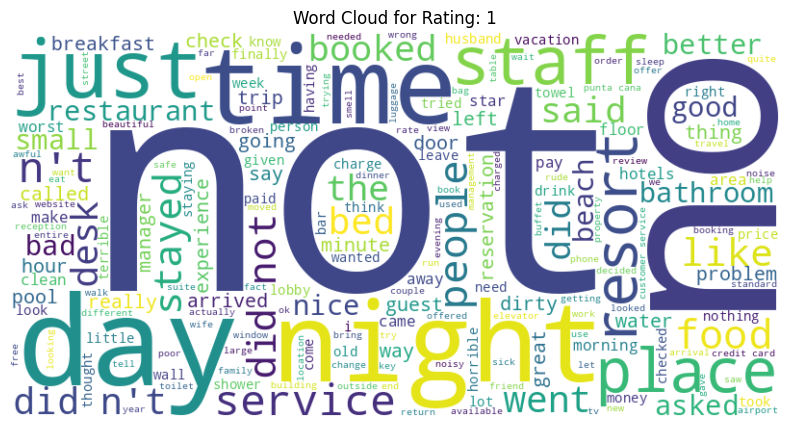

In [9]:
# prompt: draw a word cloud for rating is 1, exclude words like [`hotel`, `room`]

import pandas as pd
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt

df = pd.read_csv("https://raw.githubusercontent.com/theleadio/datascience_demo/master/tripadvisor_hotel_reviews.csv")

# Filter reviews for Rating 1
rating = 1
reviews_rating_1 = df[df.Rating == rating]['Review']

# Combine reviews for Rating 1 into a single string
text_rating_1 = " ".join(review for review in reviews_rating_1)

# Exclude specific words
stopwords = ['hotel', 'room', 'rooms', 'stay', "n", "t", "got", "told"]
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stopwords).generate(text_rating_1)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title(f'Word Cloud for Rating: {rating}')
plt.axis('off')
plt.show()


In [10]:
# prompt: find review that contains 'food' for Rating 1, print the top 10 review using for loop in full

# Filter reviews for Rating 1 that contain 'food'
reviews_rating_1_food = df[(df.Rating == 1) & (df.Review.str.contains('food', case=False))]

# Print the top 10 reviews
for i in range(min(10, len(reviews_rating_1_food))):
  print(reviews_rating_1_food.iloc[i].Review)
  print('-' * 50)

horrible customer service hotel stay february 3rd 4th 2007my friend picked hotel monaco appealing website online package included champagne late checkout 3 free valet gift spa weekend, friend checked room hours earlier came later, pulled valet young man just stood, asked valet open said, pull bags didn__Ç_é_ offer help, got garment bag suitcase came car key room number says not valet, car park car street pull, left key working asked valet park car gets, went room fine bottle champagne oil lotion gift spa, dressed went came got bed noticed blood drops pillows sheets pillows, disgusted just unbelievable, called desk sent somebody 20 minutes later, swapped sheets left apologizing, sunday morning called desk speak management sheets aggravated rude, apparently no manager kind supervisor weekend wait monday morning, young man spoke said cover food adding person changed sheets said fresh blood rude tone, checkout 3pm package booked, 12 1:30 staff maids tried walk room opening door apologizing

In [11]:
reviews_rating_1_food = df[(df.Rating == 1) & (df.Review.str.contains('food', case=False))]
pd.set_option('display.max_colwidth', None)
reviews_rating_1_food.head(10)

,Review,Rating
15,"horrible customer service hotel stay february 3rd 4th 2007my friend picked hotel monaco appealing website online package included champagne late checkout 3 free valet gift spa weekend, friend checked room hours earlier came later, pulled valet young man just stood, asked valet open said, pull bags didn__Ç_é_ offer help, got garment bag suitcase came car key room number says not valet, car park car street pull, left key working asked valet park car gets, went room fine bottle champagne oil lotion gift spa, dressed went came got bed noticed blood drops pillows sheets pillows, disgusted just unbelievable, called desk sent somebody 20 minutes later, swapped sheets left apologizing, sunday morning called desk speak management sheets aggravated rude, apparently no manager kind supervisor weekend wait monday morning, young man spoke said cover food adding person changed sheets said fresh blood rude tone, checkout 3pm package booked, 12 1:30 staff maids tried walk room opening door apologizing closing, people called saying check 12 remind package, finally packed things went downstairs check, quickly signed paper took, way took closer look room, unfortunately covered food offered charged valet, called desk ask charges lady answered snapped saying aware problem experienced monday like told earlier, life treated like hotel, not sure hotel constantly problems lucky ones stay recommend anybody know,",1
197,"agree worst hilton, absolute worst hilton stayed, gold hh members travel lot absolute worst hilton world, leg week vacation 10 year old daughter took hilton properties south lake tahoe ca way whistler bc, rate hiltons excellentfirst charge 9.95 night use internet room, free wireless internet available executive lounge small converted guest room lobby, went executive lounge comical, business people packed elbow elbow laptops using free internet eating drinking free food, sight, sure de-congest executive lounge did n't charge internet stayed hilton honors floor noticed dirty dishes newspapers hall n't picked days there.the excercise room size walk closet treadmills stepper jammed there.the people provided sort customer service bellmen, desk personnel management delt no customer service skills.my car parked hilton garage window smashed car ransacked, hilton security simply left business card smashed window took time sweep glass ground, discovered hilton security knew car broken let sit smashed window days, did notify, no, series failures hilton staff touch seattle hilton director security, asked n't notified car broken, response not policy not parking manual, hilton honors stated gm contact monday, wednesday no response, finally drafted lenghty letter hilton corporate hq regarding seattle hilton,",1
292,"checked tripadvisor place terrible just reviewers tripadvisor indicates, couple reviews looks like written hotel staff exact opposite real experience.from low quality toiletries inconsistent house keeping property rated 3 star, attempts property unique look succeeds making gag incredibly poor taste decorated, like big joke you.the hotel noisy rooms tiny decor ugly staff average isolated rest seattle view overrated nearby train noisy room stinky, lounge expensive 10 drinks good view absolutely no character, experiencing boring lounge decided not bother restaurant instead cabbed city food.i recommend using tripadvisor pick 4 star hotel instead foolish like pay consequences, fact probably pick highly rated 3 star hotel fare times better did,",1
336,"airport quality westin downtown price stayed westin week 9/15/07, observations rooms extremely dated stained carpets old bathrooms outdated fixtures amenties not nearly worth 200 night price tag, prized heavenly bedis nothing special time, including lower end hotels like courtyard hyatt place better beds, heavenly bath joke, no-name substandard bath products tub/shower combinations abound, old lighting half did n't work poorly placed tvs standard, low ceilings old hotel scents a

# Sentiment Analysis
Given a string, we want to know
- positive
- negative
- neutral
- sentiment score

In [12]:
s = "I am feeling awesome today"

In [13]:
# prompt: analyse the snetiment of s using NLTK

!pip install nltk
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [14]:
sid = SentimentIntensityAnalyzer()
scores = sid.polarity_scores(s)
scores

if scores['compound'] >= 0.05:
  print("Positive")
elif scores['compound'] <= -0.05:
  print("Negative")
else:
  print("Neutral")

Positive


In [15]:
def sentiment_analysis(text):
  sid = SentimentIntensityAnalyzer()
  scores = sid.polarity_scores(s)
  print(scores)
  if scores['compound'] >= 0.05:
    return "Positive"
  elif scores['compound'] <= -0.05:
    return "Negative"
  else:
    return "Neutral"

In [16]:
s = "not stay room north tower large beds dirty mattress covers, reported nothing fortunately placed extra sheets, cold shower showered 7am, work afternoon got warm shower 4 days, 115.00 night warm shower wanted, exercise equipment joke, 3 5 treadmills ancient, 1 did not work, exercise bikes did not work, pay 10 bucks walk block 24 hour fitness great workout time wait working machine free especially 6am 5 pm, food ok priced, stayed convention held did not want rent car, not, not recommend hotel westin connected crosswalk room prices,	"
sentiment_analysis(s)

{'neg': 0.072, 'neu': 0.715, 'pos': 0.213, 'compound': 0.8956}


'Positive'

higher value = richer sentiment

In [17]:
# prompt: analyse the sentiment for each review and store in 4 columns, neutral, positive, negative and compound

import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

def analyze_sentiment(text):
  scores = sid.polarity_scores(text)
  return scores['neu'], scores['pos'], scores['neg'], scores['compound']

# Apply the sentiment analysis function to each review and store the results in new columns
df[['neutral', 'positive', 'negative', 'compound']] = df['Review'].apply(lambda x: pd.Series(analyze_sentiment(x)))

# Display the DataFrame with the new sentiment columns
print(df)

In [18]:
neutral = 0.643
positive = 0.285
negative = 0.072

In [19]:
# prompt: get the equation of vader sentiment score

# The Vader sentiment score is calculated as follows:

# 1. **Lexicon Lookup:** Each word in the input text is looked up in a lexicon (a dictionary of words and their associated sentiment scores).
# 2. **Sentiment Scoring:** For each word found in the lexicon, its sentiment score (positive, negative, or neutral) and intensity are retrieved.
# 3. **Rule-Based Adjustments:** Several rules are applied to adjust the sentiment score based on the context of the word. For example:
#    - **Negation:** If a word is preceded by a negation word (e.g., "not," "never"), its sentiment score is reversed.
#    - **Boosters/Dampeners:** Words like "very" or "extremely" can boost the intensity of a sentiment, while words like "kind of" or "slightly" can dampen it.
# 4. **Compound Score Calculation:** The final compound score is calculated using a normalized, weighted combination of the positive, negative, and neutral scores. This compound score represents the overall sentiment of the text.

# The equation for calculating the compound score is not publicly available, as it is part of VADER's internal logic and is subject to change. However, the general approach is as described above.

# The `SentimentIntensityAnalyzer.polarity_scores()` function in VADER returns a dictionary with four keys:
# - **neg:** The negative sentiment score.
# - **neu:** The neutral sentiment score.
# - **pos:** The positive sentiment score.
# - **compound:** The compound sentiment score, which is a normalized score ranging from -1 (most negative) to +1 (most positive).

In [20]:
compound_score = (positive - negative) / ((positive + negative) + 0.000001)
print(compound_score)

0.5966369842101282


In [21]:
df

Review  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

<Figure size 1000x600 with 0 Axes>

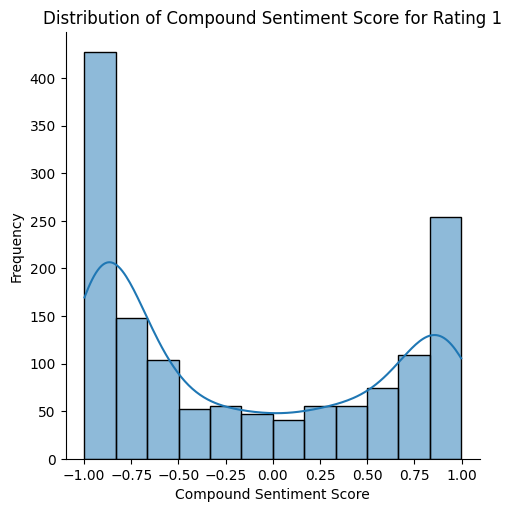

In [22]:
# prompt: draw a displot for compound, for Rating =1

import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df' and contains a 'compound' column
# ... (Your existing code to load and process the DataFrame) ...

# Filter reviews for Rating 1
df_rating_1 = df[df.Rating == 1]

# Create a displot for the 'compound' column for Rating 1
plt.figure(figsize=(10, 6))
sns.displot(df_rating_1['compound'], kde=True)
plt.title('Distribution of Compound Sentiment Score for Rating 1')
plt.xlabel('Compound Sentiment Score')
plt.ylabel('Frequency')
plt.show()

In [23]:
# prompt: write a sentiment analyser using textblob

from textblob import TextBlob

def analyze_sentiment_textblob(text):
  """
  Analyzes the sentiment of a given text using TextBlob.

  Args:
    text: The text to analyze.

  Returns:
    A tuple containing the polarity and subjectivity scores.
  """
  analysis = TextBlob(text)
  return analysis.sentiment.polarity, analysis.sentiment.subjectivity


# Example usage
text = "This is a great product! I love it."
polarity, subjectivity = analyze_sentiment_textblob(text)

print(f"Polarity: {polarity}")
print(f"Subjectivity: {subjectivity}")

# Apply the sentiment analysis function to your DataFrame (df)
df['polarity'], df['subjectivity'] = zip(*df['Review'].apply(analyze_sentiment_textblob))

# Now your DataFrame has 'polarity' and 'subjectivity' columns
print(df)

Polarity: 0.75
Subjectivity: 0.675
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

In [24]:
# prompt: find `compound` is negative, Rating == 5, sort ascending

# Find rows where 'compound' is negative and 'Rating' is 5, then sort by 'compound' in ascending order.
df_negative_compound_rating_5 = df[(df['compound'] > 0) & (df['Rating'] == 1)].sort_values('compound', ascending=False)
df_negative_compound_rating_5

Review  \
17082                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 large personalized service, terrible food terrible service stayed resort christmas holidays december 21 december 28 2007 room 65109. hotel lobby nice clean check went smoothly no hitches, staff polite check, given map, no schedule activities no information booking reservations restaurants, extra things paid package, thank god trip advisor, research.this hotel sections not packages not allowed enjoy amenities, just wander pool area comes tells leave, saw happen guests, instructions check prevent this.ok good things, property property quite nice, landscaping good not breathtaking resort kept clean, big plus given 70 buildings resort 18 rooms, did napkin calculation came 7,000 people resort occupancy christmas period, kept people waiting eat christmas dinner night send folks upgraded premier area just accommodate real nuisance actually paid upgrade.beach beach ocean just beautiful, ocean beautiful nice swim no shells no rocks just beautiful miles white sand, biggest plus vacation, plenty shade beach lounge chair reserve towel 8am morning, real downer vacationers, beach allowed topless lot that.rooms rooms comfortable clean, stayed ambar section upgrade, bed average no westin beds comfortable, air conditioner worked great, bathroom nice clean rain head showers, lighting terrible rooms, say rooms furnishings 3 star level.now areas needing improvement lots food 7,000 people place starts feel like campus instead resort food takes cafeteria quality, food terrible cold, cooks sloppy preparing meals e.g. omelettes, not trust salads lots water pan, food beach better warm, roast chicken burgers fries days, hot items, love pork enjoy dr. lots not bad, wished local food maybe better prepared, cooks not chefs did not clue, food important vacation rule resort, said did sent premier section christmas dinner overflow, food ok guess pay big bucks ok food not great, did visit reserved restaurants just set menu, pre-made just brought fridge table cold plate, none restaurants great french gourmet better tried.service no personalized service, sense employees not happy treated comes service, no really stretches provide good service, polite not necessarily pleasant, examples family friends tried transferred 5-15 minutes connecting room, sleeping night heard sounded like running water, ceiling leaking floor, called desk transferred 4am person spoke said not job__Ç, no came check leak, employees easily tell not job point says, sense employees not really empowered, black family traveling received discriminatory service staff e.g. skipping line taking white folks having waiters come serve table, experienced different points stay, apparently history dark skinned black people dr. 20 black people resort 7000 people strange, did not let spoil holiday not there.getting resort shuttle n't want walk 5-10 minute walk resort especially beach main dining areas, great thing hang getting resort does not huge anymore.nightly shows entertainment staged shows resorts average, tried french cabaret western shows e.g. lion king- course oddly interpreted, like making dinner bunch chefs guests europeans americans, mini-circus night good, better showing latin culture rich vibrant fun, nightly live band does mix imitating western ballads poorly singers reading words performing set staff organize daytime events volleyball dance sing live band dance guests nightclub,

In [25]:
# prompt: negative compound score, rating == 5, sort ascending

# Find rows where 'compound' is negative and 'Rating' is 5, then sort by 'compound' in ascending order.
df_negative_compound_rating_5 = df[(df['compound'] < 0) & (df['Rating'] == 5)].sort_values('compound', ascending=True)
print(df_negative_compound_rating_5)